In [1]:
include("./src/eda.jl")

quality_boxplot (generic function with 1 method)

In [2]:
region = "Italy"
catalog = "ingv"

"ingv"

In [3]:
df = load_data(region, catalog)

5×6 DataFrame
 Row │ Datetime                 Latitude  Longitude  Depth    Magnitude_Type  Magnitude 
     │ DateTime                 Float64   Float64    Float64  String7         Float64   
─────┼──────────────────────────────────────────────────────────────────────────────────
   1 │ 1985-01-02T18:39:30.740    48.092      7.061     10.0  M                     4.0
   2 │ 1985-01-02T22:57:43.090    41.715     13.941      5.8  Md                    2.6
   3 │ 1985-01-03T00:46:16.990    41.677     13.931      6.1  Md                    2.5
   4 │ 1985-01-04T16:57:40.240    46.158      7.174     10.0  M                     3.8
   5 │ 1985-01-04T23:59:54.820    45.338      6.641      5.0  M                     3.76×7 DataFrame
 Row │ variable        mean     min                      median                   max                      nmissing  eltype   
     │ Symbol          Union…   Any                      Any                      Any                      Int64     DataType 
─────┼──────

Row,Datetime,Latitude,Longitude,Depth,Magnitude_Type,Magnitude
,DateTime,Float64,Float64,Float64,String7,Float64
1,1985-01-02T18:39:30.740,48.092,7.061,10.0,M,4.0
2,1985-01-02T22:57:43.090,41.715,13.941,5.8,Md,2.6
3,1985-01-03T00:46:16.990,41.677,13.931,6.1,Md,2.5
4,1985-01-04T16:57:40.240,46.158,7.174,10.0,M,3.8
5,1985-01-04T23:59:54.820,45.338,6.641,5.0,M,3.7
6,1985-01-05T03:47:03.640,45.409,6.627,10.0,M,3.2
7,1985-01-05T08:32:41.900,43.056,13.139,2.8,Md,2.6
8,1985-01-05T10:13:26.800,45.15,7.86,20.8,Md,2.2
9,1985-01-05T13:06:33.110,42.62,22.312,10.0,M,4.5


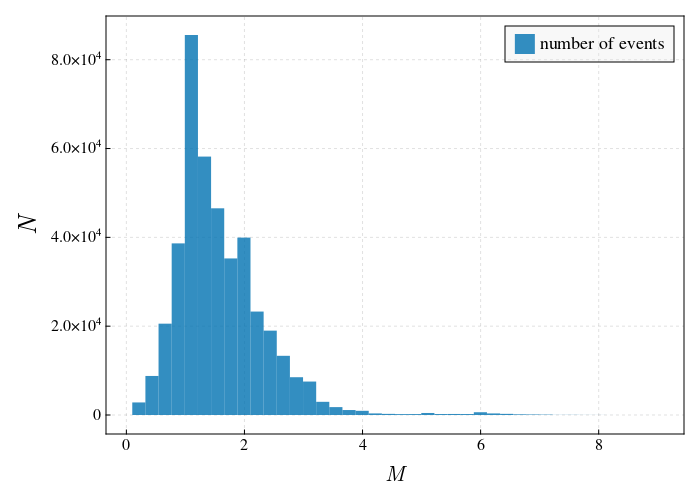

In [4]:
events_histogram_fig = events_histogram(df, region)

In [5]:
trim_year = 1985
explore_trim_year = 1985

df_trimmed = explore_timespan(df, region, trim_year, explore_trim_year; magnitude_threshold=0.0)

Row,Datetime,Latitude,Longitude,Depth,Magnitude_Type,Magnitude
,DateTime,Float64,Float64,Float64,String7,Float64
1,1985-01-02T18:39:30.740,48.092,7.061,10.0,M,4.0
2,1985-01-02T22:57:43.090,41.715,13.941,5.8,Md,2.6
3,1985-01-03T00:46:16.990,41.677,13.931,6.1,Md,2.5
4,1985-01-04T16:57:40.240,46.158,7.174,10.0,M,3.8
5,1985-01-04T23:59:54.820,45.338,6.641,5.0,M,3.7
6,1985-01-05T03:47:03.640,45.409,6.627,10.0,M,3.2
7,1985-01-05T08:32:41.900,43.056,13.139,2.8,Md,2.6
8,1985-01-05T10:13:26.800,45.15,7.86,20.8,Md,2.2
9,1985-01-05T13:06:33.110,42.62,22.312,10.0,M,4.5


In [7]:
if "Magnitude_Type" in names(df)
    df_mag_type_count = magtype_boxplot(df, region, mag_type_descriptions=[])
end

if "Quality" in names(df)
    df_quality_count = quality_boxplot(df, region)
end

TypeError: TypeError: non-boolean (Vector{Any}) used in boolean context

In [8]:
italy = df[(df.Longitude .>= 6.6166 ) .& (df.Longitude .<= 18.5166) .&
				  (df.Latitude .>=35.5) .& (df.Latitude .<= 47.0833) ,:]

Row,Datetime,Latitude,Longitude,Depth,Magnitude_Type,Magnitude
,DateTime,Float64,Float64,Float64,String7,Float64
1,1985-01-02T22:57:43.090,41.715,13.941,5.8,Md,2.6
2,1985-01-03T00:46:16.990,41.677,13.931,6.1,Md,2.5
3,1985-01-04T16:57:40.240,46.158,7.174,10.0,M,3.8
4,1985-01-04T23:59:54.820,45.338,6.641,5.0,M,3.7
5,1985-01-05T03:47:03.640,45.409,6.627,10.0,M,3.2
6,1985-01-05T08:32:41.900,43.056,13.139,2.8,Md,2.6
7,1985-01-05T10:13:26.800,45.15,7.86,20.8,Md,2.2
8,1985-01-06T03:52:23.380,43.357,12.537,10.0,Md,2.4
9,1985-01-06T04:19:36.650,43.37,12.545,10.0,Md,2.3


In [10]:
# Write to CSV
# CSV.write("./data/$(region).csv", italy)